In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format = '{:.4f}'.format
import warnings
warnings.filterwarnings('ignore')
import datetime

In [2]:
cab_data = pd.read_csv('/Users/haitonghuang/G2M-insight-for-Cab-Investment-firm/Cab_Data.csv')
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.4500,370.9500,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.6200,358.5200,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.0400,125.2000,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.1700,377.4000,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.7300,114.6200,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.8000,69.2400,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.4000,113.7500,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.7500,437.0700,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.8000,146.1900,114.0480


In [3]:
city = pd.read_csv('/Users/haitonghuang/G2M-insight-for-Cab-Investment-firm/City.csv')
city

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [4]:
Customer = pd.read_csv('/Users/haitonghuang/G2M-insight-for-Cab-Investment-firm/Customer_ID.csv')
Customer

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [5]:
transaction = pd.read_csv('/Users/haitonghuang/G2M-insight-for-Cab-Investment-firm/Transaction_ID.csv')
transaction

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


## Master Dataset

In [6]:
full = pd.merge(transaction,cab_data, how ='left',left_on='Transaction ID',right_on='Transaction ID')
full = pd.merge(full,Customer, how = 'left' , on = 'Customer ID')
full

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,42377.0000,Pink Cab,ATLANTA GA,30.4500,370.9500,313.6350,Male,28,10813
1,10000012,27703,Card,42375.0000,Pink Cab,ATLANTA GA,28.6200,358.5200,334.8540,Male,27,9237
2,10000013,28712,Cash,42371.0000,Pink Cab,ATLANTA GA,9.0400,125.2000,97.6320,Male,53,11242
3,10000014,28020,Cash,42376.0000,Pink Cab,ATLANTA GA,33.1700,377.4000,351.6020,Male,23,23327
4,10000015,27182,Card,42372.0000,Pink Cab,ATLANTA GA,8.7300,114.6200,97.7760,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...
440093,10440104,53286,Cash,43104.0000,Yellow Cab,WASHINGTON DC,8.4000,113.7500,106.8480,Male,32,6528
440094,10440105,52265,Cash,43105.0000,Yellow Cab,WASHINGTON DC,27.7500,437.0700,349.6500,Male,56,7966
440095,10440106,52175,Card,43105.0000,Yellow Cab,WASHINGTON DC,8.8000,146.1900,114.0480,Male,32,6423
440096,10440107,52917,Card,43102.0000,Yellow Cab,WASHINGTON DC,12.7600,191.5800,177.6192,Male,20,11284


In [7]:
full['profit'] = full['Price Charged'] - full['Cost of Trip']
full['profit_margin_in_%'] = full['profit'] / full['Price Charged']
full['price_per_KM'] = full['Price Charged'] / full['KM Travelled']
full['profit_per_KM'] = full['profit'] / full['price_per_KM']

In [8]:
full.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),profit,profit_margin_in_%,price_per_KM,profit_per_KM
0,10000011,29290,Card,42377.0000,Pink Cab,ATLANTA GA,30.4500,370.9500,313.6350,Male,28,10813,57.3150,0.1545,12.1823,4.7048
1,10000012,27703,Card,42375.0000,Pink Cab,ATLANTA GA,28.6200,358.5200,334.8540,Male,27,9237,23.6660,0.0660,12.5269,1.8892
2,10000013,28712,Cash,42371.0000,Pink Cab,ATLANTA GA,9.0400,125.2000,97.6320,Male,53,11242,27.5680,0.2202,13.8496,1.9905
3,10000014,28020,Cash,42376.0000,Pink Cab,ATLANTA GA,33.1700,377.4000,351.6020,Male,23,23327,25.7980,0.0684,11.3778,2.2674
4,10000015,27182,Card,42372.0000,Pink Cab,ATLANTA GA,8.7300,114.6200,97.7760,Male,33,8536,16.8440,0.1470,13.1294,1.2829


In [9]:
full.shape

(440098, 16)

In [10]:
full.dtypes

Transaction ID          int64
Customer ID             int64
Payment_Mode           object
Date of Travel        float64
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Gender                 object
Age                     int64
Income (USD/Month)      int64
profit                float64
profit_margin_in_%    float64
price_per_KM          float64
profit_per_KM         float64
dtype: object

In [11]:
full.isnull().sum()

Transaction ID            0
Customer ID               0
Payment_Mode              0
Date of Travel        80706
Company               80706
City                  80706
KM Travelled          80706
Price Charged         80706
Cost of Trip          80706
Gender                    0
Age                       0
Income (USD/Month)        0
profit                80706
profit_margin_in_%    80706
price_per_KM          80706
profit_per_KM         80706
dtype: int64

## Nulls Analysis

In [12]:
nulls = full.loc[full['Company'].isnull()]
nulls.head(5)

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),profit,profit_margin_in_%,price_per_KM,profit_per_KM
192,10000203,43177,Card,NaN,NaN,NaN,NaN,NaN,NaN,Male,52,3266,NaN,NaN,NaN,NaN
193,10000204,44348,Cash,NaN,NaN,NaN,NaN,NaN,NaN,Male,22,29304,NaN,NaN,NaN,NaN
194,10000205,44599,Cash,NaN,NaN,NaN,NaN,NaN,NaN,Male,35,5157,NaN,NaN,NaN,NaN
195,10000206,44264,Cash,NaN,NaN,NaN,NaN,NaN,NaN,Male,41,13981,NaN,NaN,NaN,NaN
196,10000207,43369,Cash,NaN,NaN,NaN,NaN,NaN,NaN,Male,31,18561,NaN,NaN,NaN,NaN


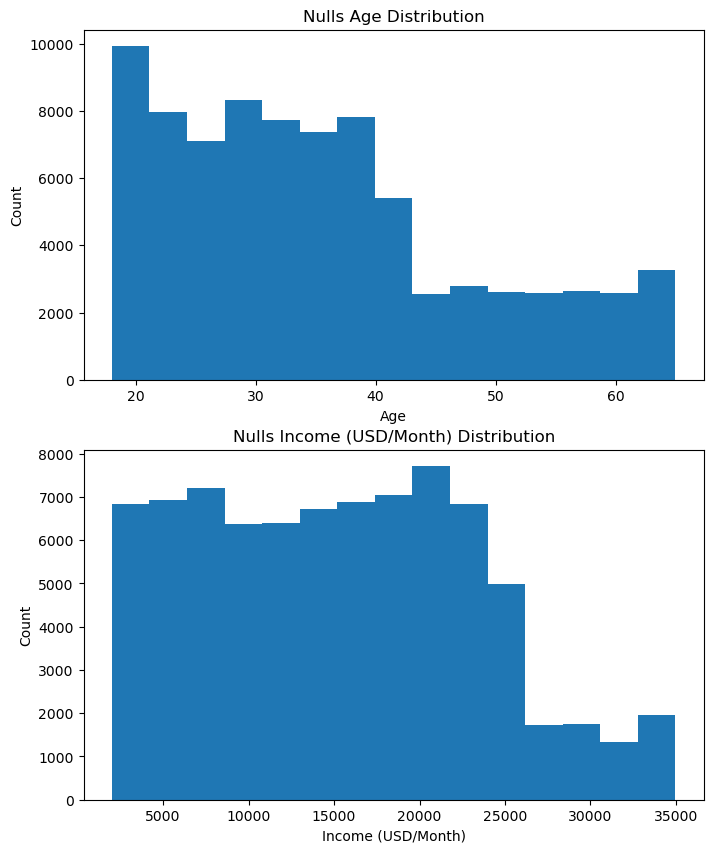

In [13]:
fig,ax = plt.subplots(2,figsize = (8,10))

ax[0].hist(nulls['Age'],bins=15)
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Count')
ax[0].set_title('Nulls Age Distribution')

ax[1].hist(nulls['Income (USD/Month)'],bins=15)
ax[1].set_xlabel('Income (USD/Month)')
ax[1].set_ylabel('Count')
ax[1].set_title('Nulls Income (USD/Month) Distribution')
plt.show()


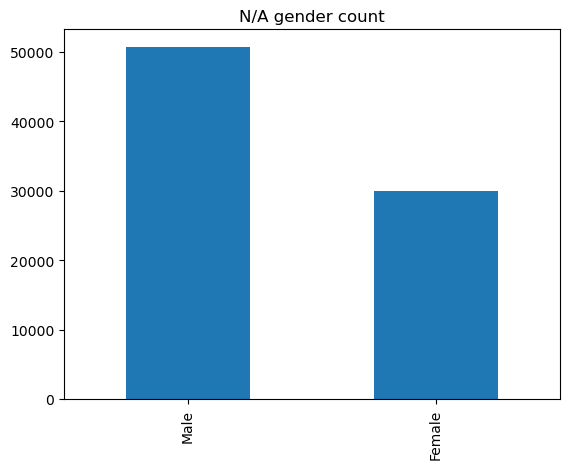

In [14]:
full.loc[full['Company'].isnull()]['Gender'].value_counts().plot(kind='bar',title = 'N/A gender count')
plt.show()

<AxesSubplot:title={'center':'Nulls payment method count'}>

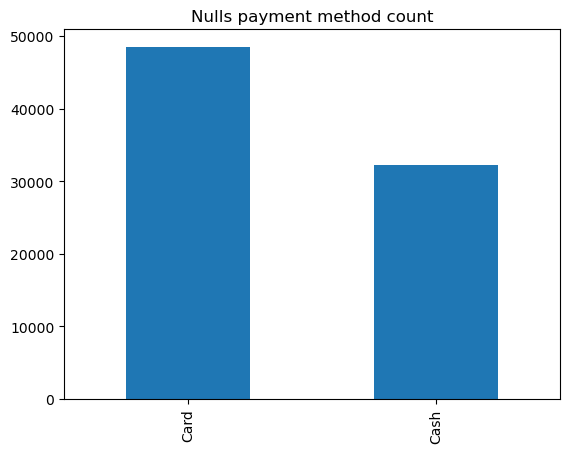

In [15]:
nulls['Payment_Mode'].value_counts().plot(kind='bar',title = 'Nulls payment method count')

## Market Share

In [16]:
market_share = pd.merge(full.groupby(['Company','City'])['Customer ID'].count().to_frame('customer count').reset_index(),city,on='City',how='inner')


In [17]:
market_share['Population'] = market_share['Population'].str.replace(',','').astype(int)
market_share['Users'] = market_share['Users'].str.replace(',','').astype(int)
market_share['market_share'] = market_share['customer count']/ market_share['Users']
market_share['costomer_to_city_population_ratio'] = market_share['customer count'] / market_share['Population']

In [18]:
market_share.dtypes

Company                               object
City                                  object
customer count                         int64
Population                             int64
Users                                  int64
market_share                         float64
costomer_to_city_population_ratio    float64
dtype: object

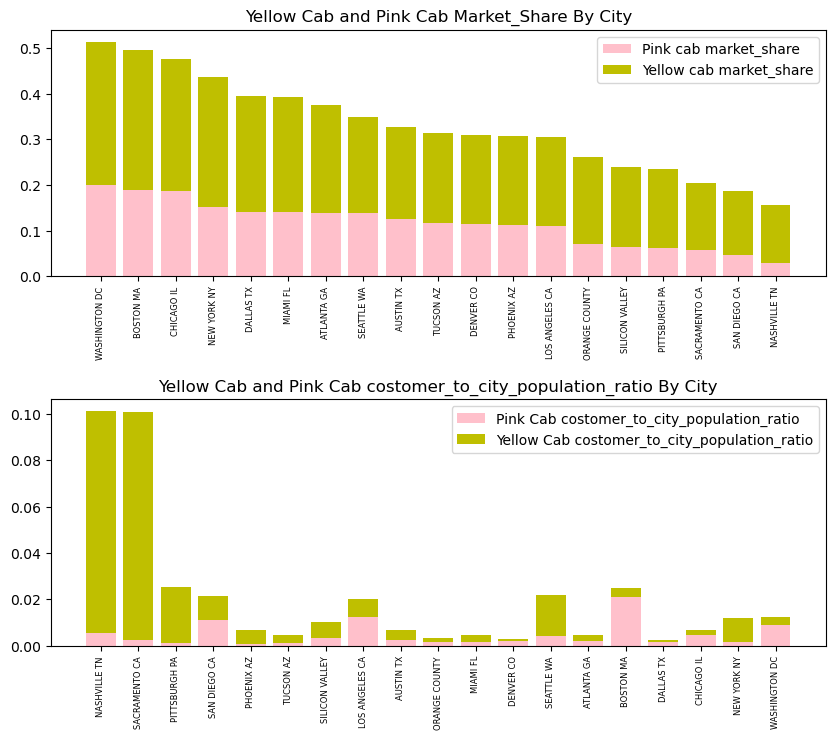

In [19]:
market_share_yellow = market_share.loc[market_share['Company'] == 'Yellow Cab'].sort_values(by=['market_share','costomer_to_city_population_ratio'],ascending = [False,False])
market_share_pink = market_share.loc[market_share['Company'] == 'Pink Cab'].sort_values(by=['market_share','costomer_to_city_population_ratio'],ascending = [False,False])

fig, ax = plt.subplots(2,figsize = (10,8))
ax[0].bar(market_share_yellow['City'],market_share_pink['market_share'],color  = 'pink')
ax[0].bar(market_share_yellow['City'], market_share_yellow['market_share'],bottom = market_share_pink['market_share'],color = 'y')
ax[0].set_xticklabels(market_share_yellow['City'],rotation = 90, fontsize = 6)
ax[0].legend(['Pink cab market_share','Yellow cab market_share'])
ax[0].set_title('Yellow Cab and Pink Cab Market_Share By City')

ax[1].bar(market_share_yellow['City'], market_share_pink['costomer_to_city_population_ratio'],color = 'pink')
ax[1].bar(market_share_yellow['City'],market_share_yellow['costomer_to_city_population_ratio'],bottom = market_share_pink['costomer_to_city_population_ratio'],color = 'y')
ax[1].set_xticklabels(market_share_pink['City'],rotation = 90, fontsize = 6)
ax[1].legend(['Pink Cab costomer_to_city_population_ratio', 'Yellow Cab costomer_to_city_population_ratio'])
ax[1].set_title('Yellow Cab and Pink Cab costomer_to_city_population_ratio By City')
fig.subplots_adjust(hspace=0.5)
plt.savefig('Market Share.png')
plt.show()


## Profit Analysis

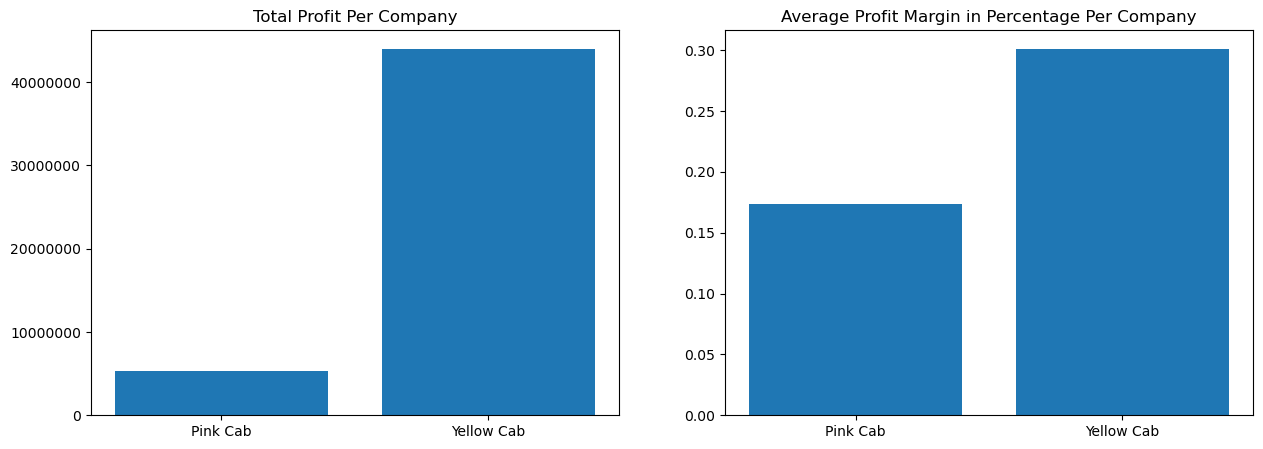

In [20]:
profit = full.groupby('Company')['profit'].sum().to_frame('total_profit').reset_index()
profit_margin_mean = full.groupby('Company')['profit_margin_in_%'].mean().to_frame('avg profit margin %').reset_index()
fig,ax = plt.subplots(1,2,figsize = (15,5))
ax[0].bar(profit['Company'],profit['total_profit'])
ax[0].set_title('Total Profit Per Company')
ax[0].ticklabel_format(style='plain', axis='y')
ax[1].bar(profit_margin_mean['Company'],profit_margin_mean['avg profit margin %'])
ax[1].set_title('Average Profit Margin in Percentage Per Company')
plt.savefig('Total Profit.png')
plt.show()


## Profit_by_city

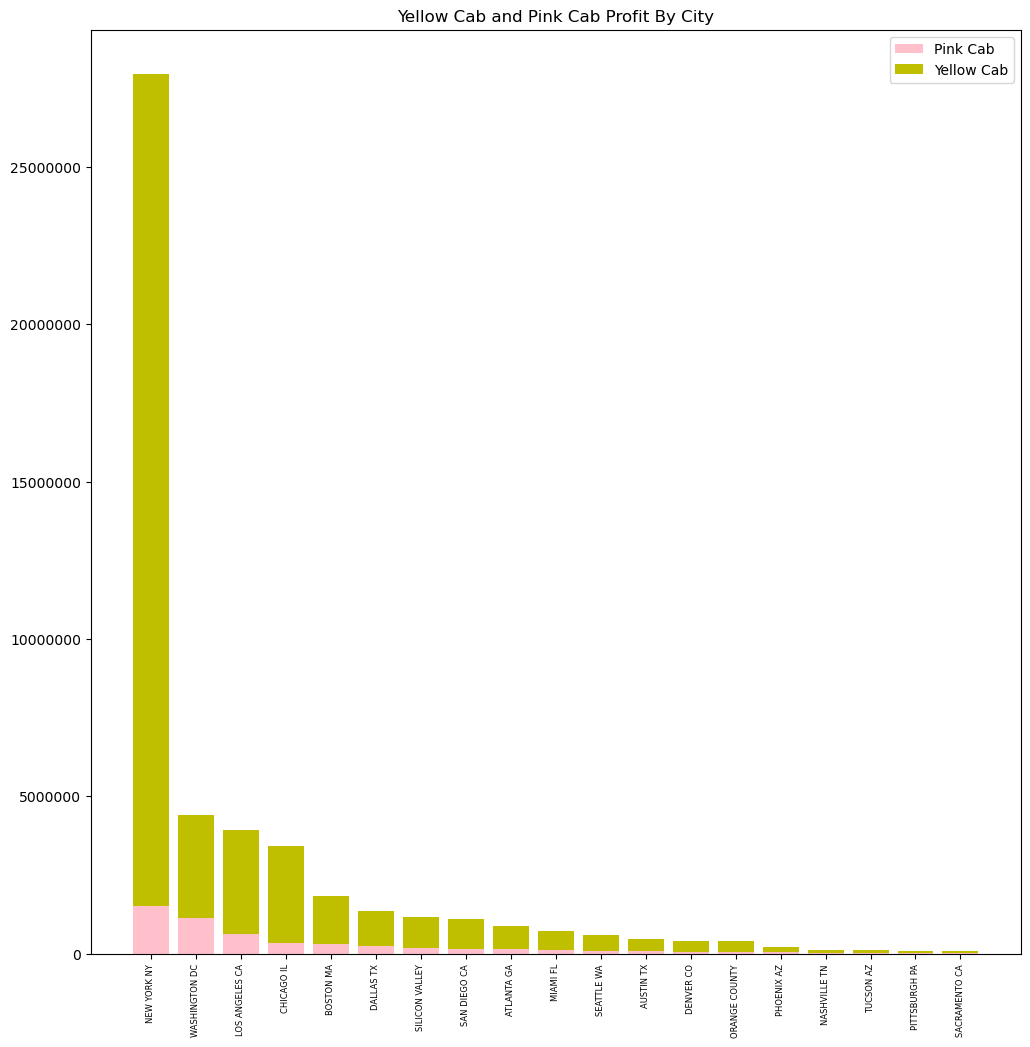

In [21]:
Profit_by_city = full.groupby(['Company','City'])['profit'].sum().to_frame('total profit by city').reset_index()
pinkcab = Profit_by_city.loc[Profit_by_city['Company'] == 'Pink Cab'].sort_values(by = ['total profit by city','City'], ascending = [False,False])
yellow_cab = Profit_by_city.loc[Profit_by_city['Company'] == 'Yellow Cab'].sort_values(by = ['total profit by city','City'], ascending = [False,False])

fig, ax = plt.subplots(figsize = (12,12))
ax.bar(yellow_cab['City'], pinkcab['total profit by city'],color = 'pink' )
ax.bar(yellow_cab['City'], yellow_cab['total profit by city'], bottom =pinkcab['total profit by city'],color = 'y')
ax.legend(['Pink Cab','Yellow Cab'])
ax.set_xticklabels(yellow_cab['City'],rotation=90,fontsize = 6)
ax.ticklabel_format(style='plain', axis='y')
ax.set_title('Yellow Cab and Pink Cab Profit By City')
plt.savefig('Total Profit by City.png')
plt.show()

## Profit Margin by city

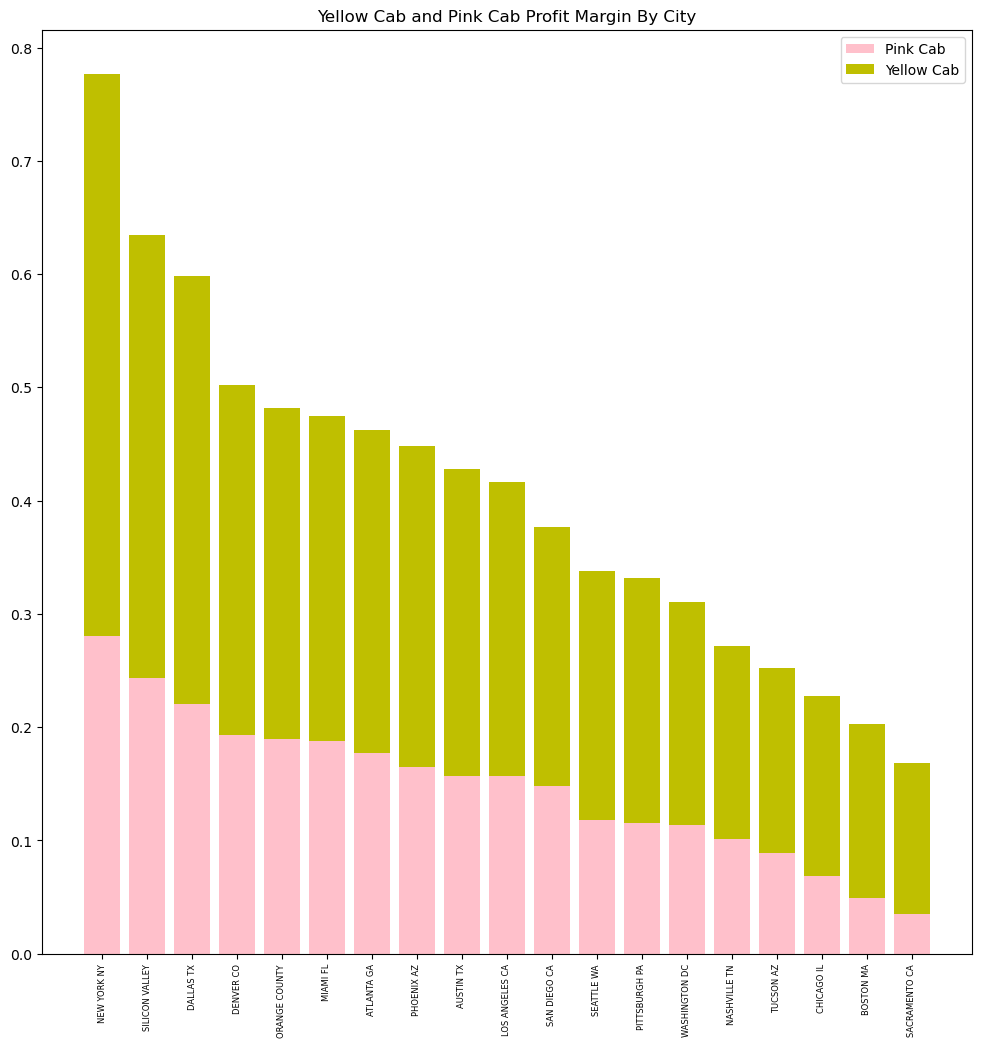

In [22]:
Profit_margin_by_city = full.groupby(['Company','City'])['profit_margin_in_%'].mean().to_frame('avg profit margin by city').reset_index()
pinkcab_margin = Profit_margin_by_city.loc[Profit_by_city['Company'] == 'Pink Cab'].sort_values(by = 'avg profit margin by city', ascending = False)
yellow_cab_margin = Profit_margin_by_city.loc[Profit_by_city['Company'] == 'Yellow Cab'].sort_values(by = 'avg profit margin by city', ascending = False)

fig, ax = plt.subplots(figsize = (12,12))
ax.bar(yellow_cab_margin['City'], pinkcab_margin['avg profit margin by city'], color = 'pink')

ax.bar(yellow_cab_margin['City'], yellow_cab_margin['avg profit margin by city'],bottom = pinkcab_margin['avg profit margin by city'], color = 'y')
ax.set_title('Yellow Cab and Pink Cab Profit Margin By City')
ax.set_xticklabels(yellow_cab_margin['City'],rotation=90,fontsize = 6)
ax.ticklabel_format(style='plain', axis='y')
ax.legend(['Pink Cab','Yellow Cab'])
plt.savefig('Total Profit margin by City.png')
plt.show()

## Average price Per KM by city

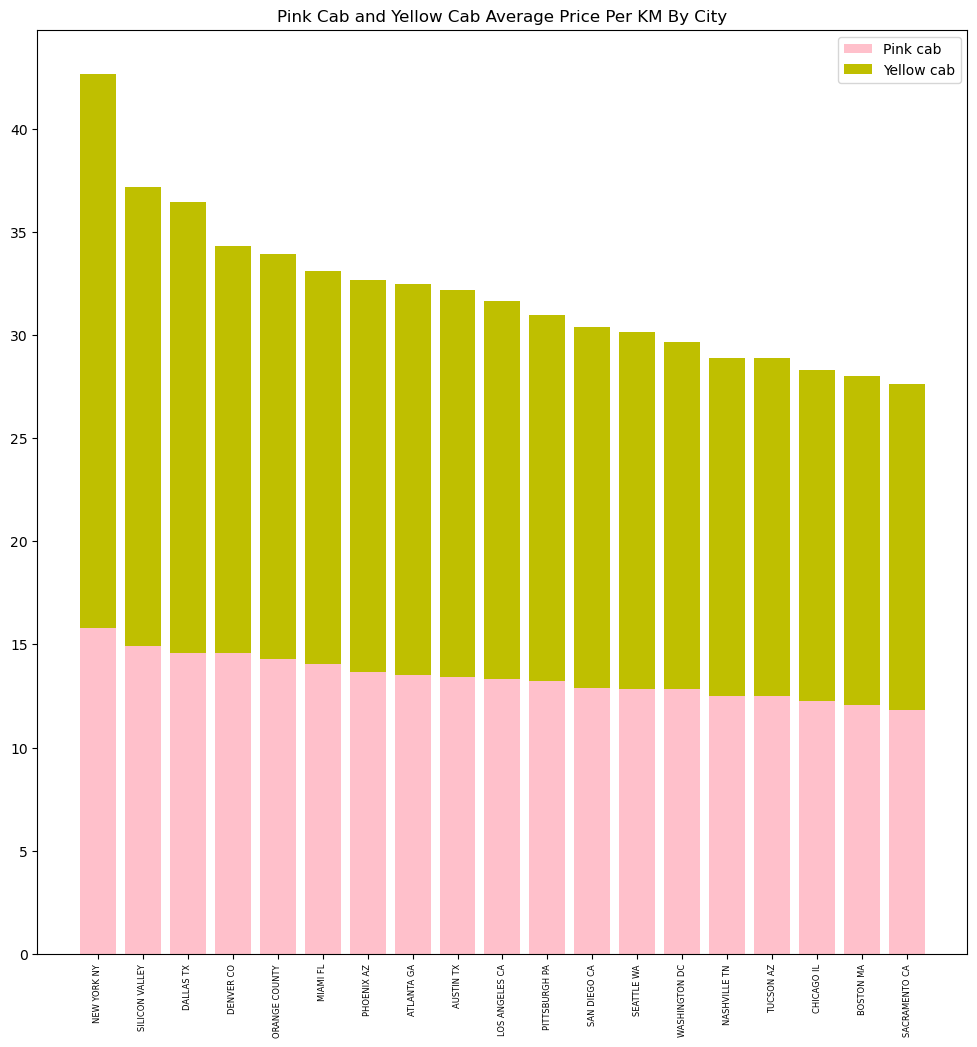

In [23]:
avg_price_perKM_by_city = full.groupby(['Company','City'])['price_per_KM'].mean().to_frame('avg price per KM by city').reset_index()
pinkcab_priceKM = avg_price_perKM_by_city.loc[Profit_by_city['Company'] == 'Pink Cab'].sort_values(by = 'avg price per KM by city', ascending = False)
yellow_cab_priceKM = avg_price_perKM_by_city.loc[Profit_by_city['Company'] == 'Yellow Cab'].sort_values(by = 'avg price per KM by city', ascending = False)

fig, ax = plt.subplots(figsize = (12,12))
ax.bar(yellow_cab_priceKM['City'], pinkcab_priceKM['avg price per KM by city'],color = 'pink')

ax.bar(yellow_cab_priceKM['City'], yellow_cab_priceKM['avg price per KM by city'], bottom = pinkcab_priceKM['avg price per KM by city'], color = 'y')
ax.set_title('Pink Cab and Yellow Cab Average Price Per KM By City')
ax.set_xticklabels(yellow_cab_priceKM['City'],rotation=90,fontsize = 6)
ax.ticklabel_format(style='plain', axis='y')
ax.legend(['Pink cab','Yellow cab'])
plt.savefig('Average price charged by City per KM.png')
plt.show()

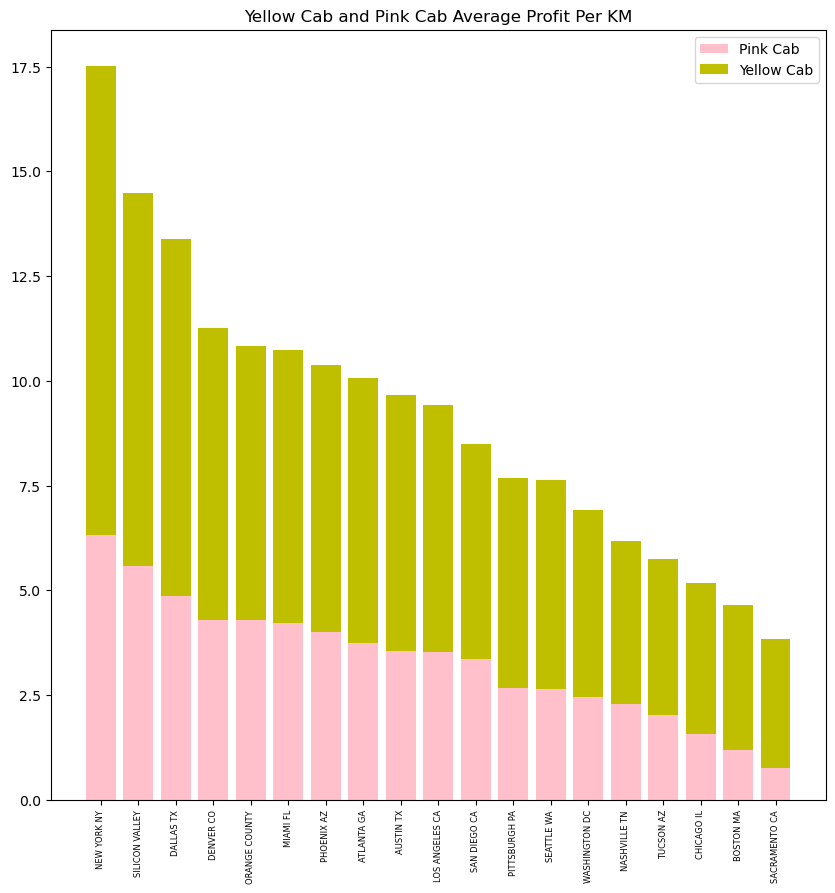

In [24]:
profit_per_km = full.groupby(['Company','City'])['profit_per_KM'].mean().to_frame('avg_profit_per_km').reset_index().sort_values(by='avg_profit_per_km',ascending = False)
profit_per_km_yellow = profit_per_km.loc[profit_per_km['Company'] == 'Yellow Cab']
profit_per_km_pink = profit_per_km.loc[profit_per_km['Company'] == 'Pink Cab']

fig,ax = plt.subplots(figsize = (10,10))
ax.bar(profit_per_km_yellow['City'], profit_per_km_pink['avg_profit_per_km'], color = 'pink')
ax.bar(profit_per_km_yellow['City'], profit_per_km_yellow['avg_profit_per_km'], bottom =profit_per_km_pink['avg_profit_per_km'],color = 'y' )
ax.set_title('Yellow Cab and Pink Cab Average Profit Per KM')
ax.legend(['Pink Cab','Yellow Cab'])
ax.set_xticklabels(profit_per_km_yellow['City'], rotation = 90,fontsize = 6)
plt.savefig('Average Profit by City per KM.png')
plt.show()

## Client prifit by Gender

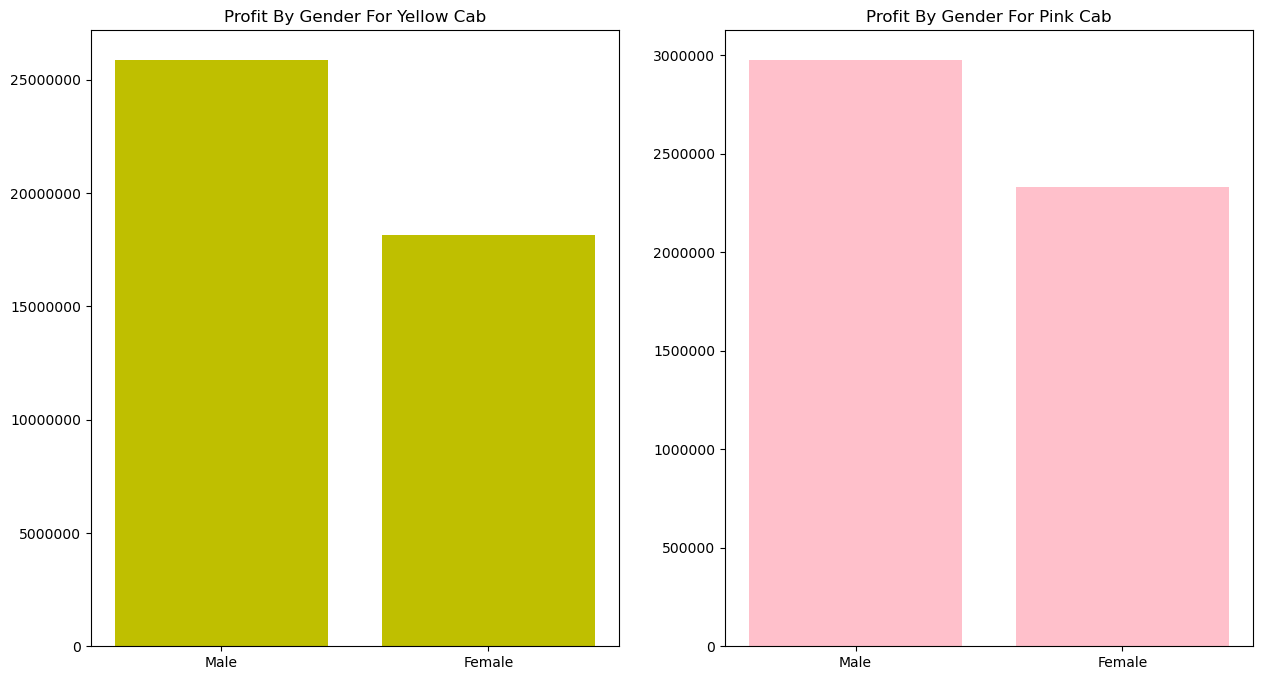

In [25]:
profit_by_gender = full.groupby(['Company','Gender'])['profit'].sum().to_frame('profit by gender').reset_index()
pinkcab_gender_profit = profit_by_gender.loc[profit_by_gender['Company'] == 'Pink Cab'].sort_values(by = 'profit by gender', ascending = False)
yellow_cab_gender = profit_by_gender.loc[profit_by_gender['Company'] == 'Yellow Cab'].sort_values(by = 'profit by gender', ascending = False)
fig,ax = plt.subplots(1,2,figsize = (15,8))

ax[0].bar(yellow_cab_gender['Gender'], yellow_cab_gender['profit by gender'],color = 'y')
ax[0].ticklabel_format(style='plain', axis='y')
ax[0].set_title('Profit By Gender For Yellow Cab')
ax[1].bar(pinkcab_gender_profit['Gender'],pinkcab_gender_profit['profit by gender'], color = 'pink')
ax[1].ticklabel_format(style='plain', axis='y')
ax[1].set_title('Profit By Gender For Pink Cab')
plt.savefig('Profit by Gender.png')
plt.show()

## Client Average Income By City

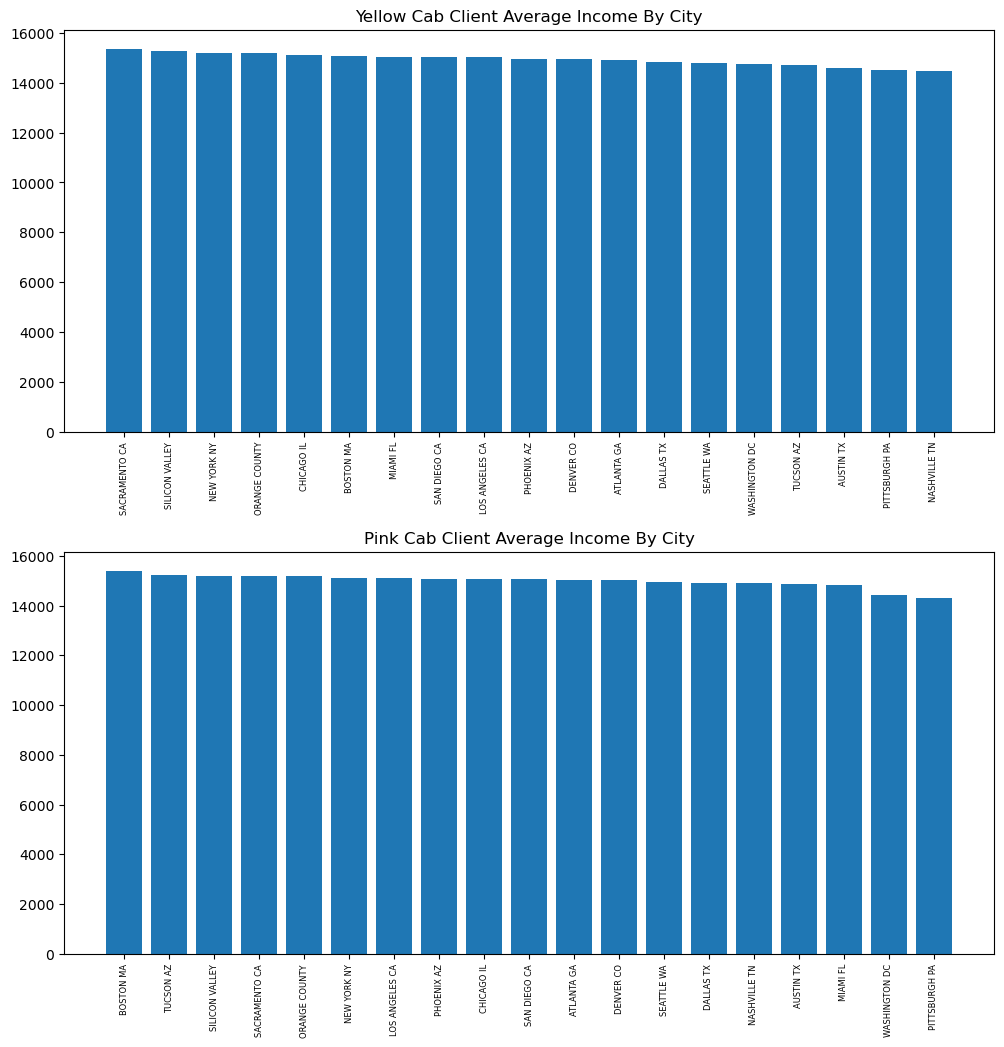

In [26]:
avg_income_by_city = full.groupby(['Company','City'])['Income (USD/Month)'].mean().to_frame('avg Income by city').reset_index()
pinkcab_avgincome = avg_income_by_city.loc[Profit_by_city['Company'] == 'Pink Cab'].sort_values(by = 'avg Income by city', ascending = False)
yellow_cab_avgincome = avg_income_by_city.loc[Profit_by_city['Company'] == 'Yellow Cab'].sort_values(by = 'avg Income by city', ascending = False)

fig, ax = plt.subplots(2, figsize = (12,12))
ax[0].bar(yellow_cab_avgincome['City'], yellow_cab_avgincome['avg Income by city'])
ax[0].set_title('Yellow Cab Client Average Income By City')
ax[0].set_xticklabels(yellow_cab_avgincome['City'],rotation=90,fontsize = 6)
ax[0].ticklabel_format(style='plain', axis='y')
ax[1].bar(pinkcab_avgincome['City'], pinkcab_avgincome['avg Income by city'])
ax[1].set_title('Pink Cab Client Average Income By City')
ax[1].set_xticklabels(pinkcab_avgincome['City'],rotation=90,fontsize = 6)
ax[1].ticklabel_format(style='plain', axis='y')
fig.subplots_adjust(hspace=0.3)
plt.show()

In [27]:
no_nas_full = full.dropna()

<AxesSubplot:>

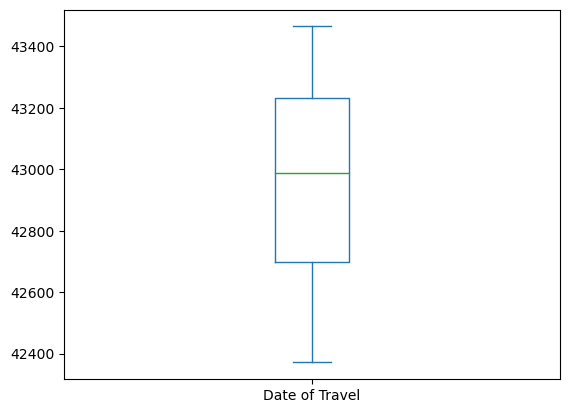

In [28]:
no_nas_full['Date of Travel'].plot(kind = 'box')

In [29]:
no_nas_full['Date'] = pd.to_datetime(no_nas_full['Date of Travel'], unit='D', origin='1899-12-30')

In [30]:
no_nas_full['year'] = no_nas_full['Date'].dt.year
no_nas_full['month'] = no_nas_full['Date'].dt.month

## Time Series Analysis

In [31]:
profit_over_time = no_nas_full.groupby(['Company','City','year','month'])['profit'].sum().to_frame('total profit over time').reset_index().sort_values(by = ['year','month'],ascending = [True,True])
profit_over_time

,Company,City,year,month,total profit over time
0,Pink Cab,ATLANTA GA,2016,1,1261.1210
36,Pink Cab,AUSTIN TX,2016,1,409.3860
72,Pink Cab,BOSTON MA,2016,1,2780.8070
108,Pink Cab,CHICAGO IL,2016,1,7492.2270
144,Pink Cab,DALLAS TX,2016,1,-327.9270
...,...,...,...,...,...
1223,Yellow Cab,SAN DIEGO CA,2018,12,20537.4656
1259,Yellow Cab,SEATTLE WA,2018,12,13521.8024
1295,Yellow Cab,SILICON VALLEY,2018,12,38764.2564
1331,Yellow Cab,TUCSON AZ,2018,12,2522.2540


In [32]:
profit_over_time2 = no_nas_full.groupby(['Company','year','month'])['profit'].sum().to_frame('total profit over time').reset_index().sort_values(by = ['year','month'],ascending = [True,True])
profit_over_time2

,Company,year,month,total profit over time
0,Pink Cab,2016,1,73952.8630
36,Yellow Cab,2016,1,836308.1108
1,Pink Cab,2016,2,87475.5440
37,Yellow Cab,2016,2,1009169.1724
2,Pink Cab,2016,3,87801.1830
...,...,...,...,...
69,Yellow Cab,2018,10,1273756.2500
34,Pink Cab,2018,11,239337.7310
70,Yellow Cab,2018,11,1416933.3272
35,Pink Cab,2018,12,285605.9270


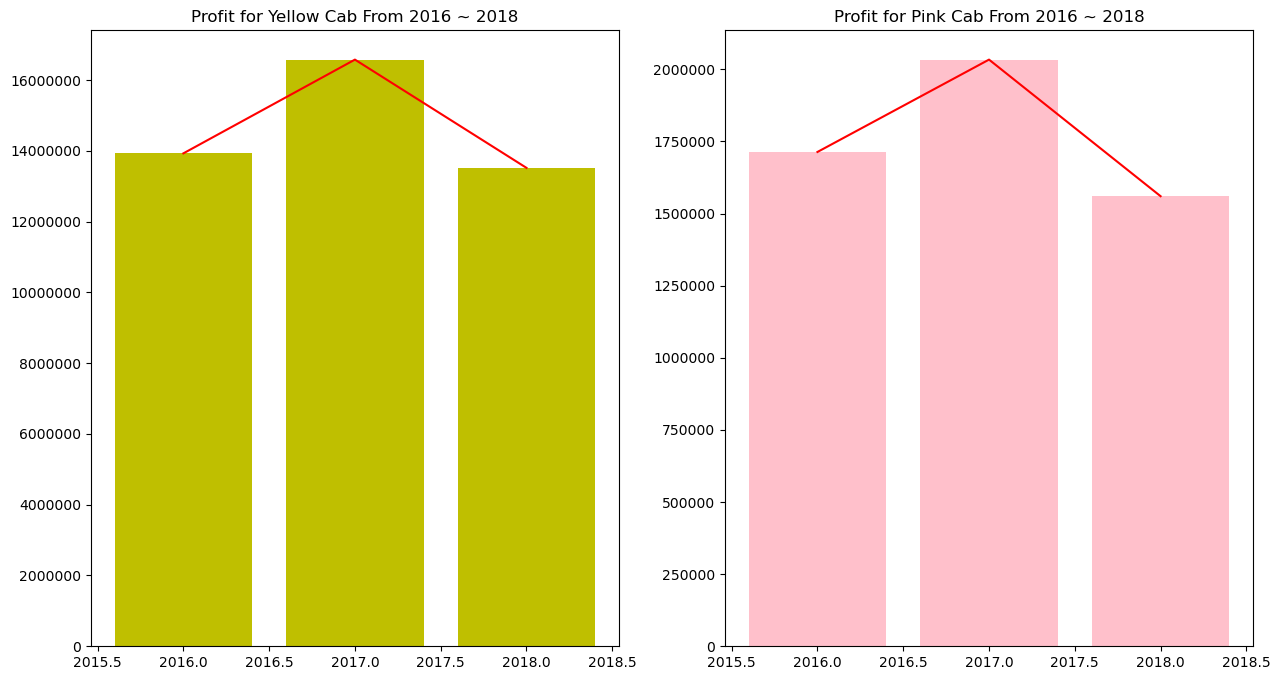

In [33]:
yellow = profit_over_time2.loc[profit_over_time2['Company'] == 'Yellow Cab'].groupby('year')['total profit over time'].sum().to_frame('profit_year').reset_index()
pink = profit_over_time2.loc[profit_over_time2['Company'] == 'Pink Cab'].groupby('year')['total profit over time'].sum().to_frame('profit_year').reset_index()

fig,ax = plt.subplots(1,2,figsize = (15,8))
ax[0].bar(yellow['year'],yellow['profit_year'],color = 'y')
ax[0].plot(yellow['year'],yellow['profit_year'],color = 'r')
ax[0].ticklabel_format(style='plain', axis='y')
ax[0].set_title('Profit for Yellow Cab From 2016 ~ 2018')
ax[1].bar(pink['year'],pink['profit_year'],color = 'pink')
ax[1].plot(pink['year'],pink['profit_year'],color = 'r')
ax[1].ticklabel_format(style='plain', axis='y')
ax[1].set_title('Profit for Pink Cab From 2016 ~ 2018')
plt.savefig('Profit over year.png')
plt.show()

In [34]:
yellow_2016 = profit_over_time.loc[(profit_over_time['Company'] == 'Yellow Cab') & (profit_over_time['year'] == 2016)]
yellow_2017 = profit_over_time.loc[(profit_over_time['Company'] == 'Yellow Cab') & (profit_over_time['year'] == 2017)]
yellow_2018 = profit_over_time.loc[(profit_over_time['Company'] == 'Yellow Cab') & (profit_over_time['year'] == 2018)]


pink_2016 = profit_over_time.loc[(profit_over_time['Company'] == 'Pink Cab') & (profit_over_time['year'] == 2016)]
pink_2017 = profit_over_time.loc[(profit_over_time['Company'] == 'Pink Cab') & (profit_over_time['year'] == 2017)]
pink_2018 = profit_over_time.loc[(profit_over_time['Company'] == 'Pink Cab') & (profit_over_time['year'] == 2018)]


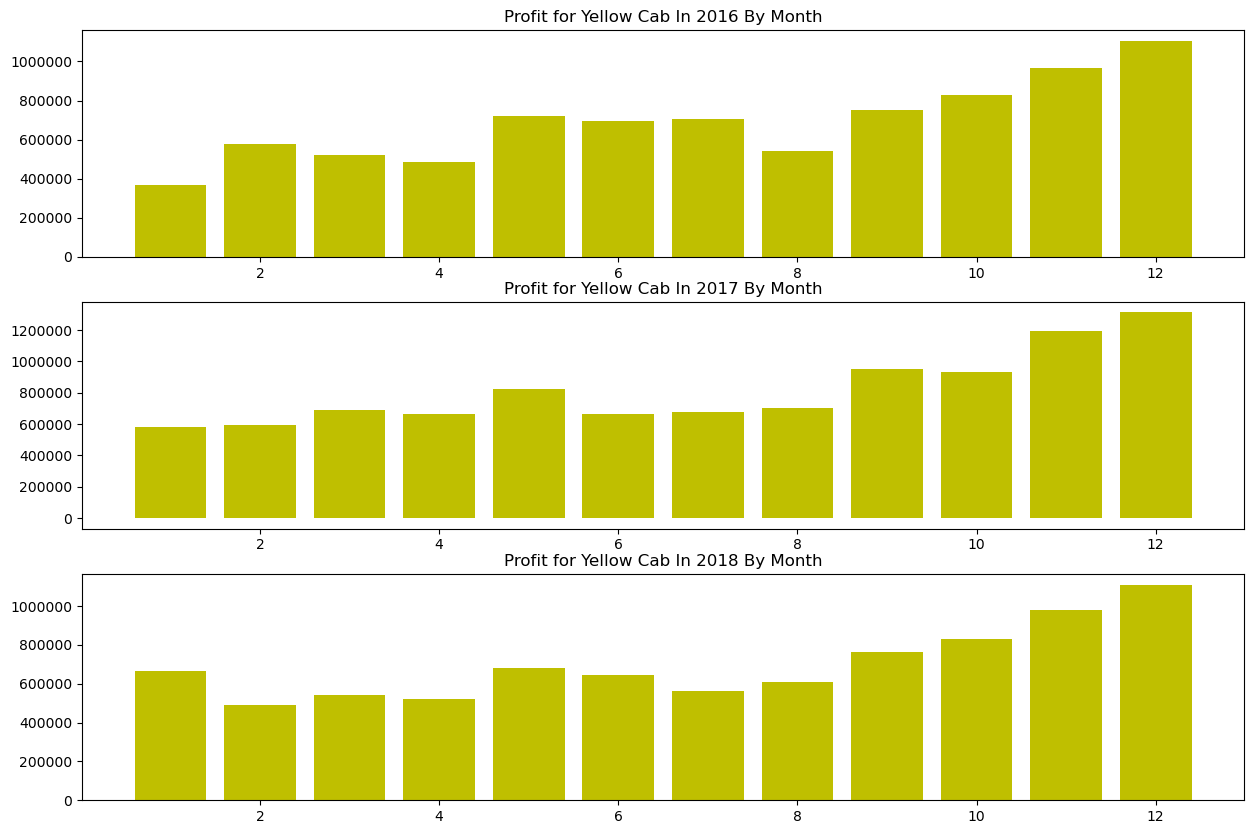

In [35]:
fig,ax = plt.subplots(3,figsize = (15,10))
ax[0].bar(yellow_2016['month'], yellow_2016['total profit over time'],color = 'y')
ax[0].ticklabel_format(style='plain', axis='y')
ax[0].set_title('Profit for Yellow Cab In 2016 By Month')
ax[1].bar(yellow_2017['month'], yellow_2017['total profit over time'],color = 'y')
ax[1].ticklabel_format(style='plain', axis='y')
ax[1].set_title('Profit for Yellow Cab In 2017 By Month')
ax[2].bar(yellow_2018['month'], yellow_2018['total profit over time'],color = 'y')
ax[2].ticklabel_format(style='plain', axis='y')
ax[2].set_title('Profit for Yellow Cab In 2018 By Month')
plt.savefig('Yellow Cab time series.png')
plt.show()

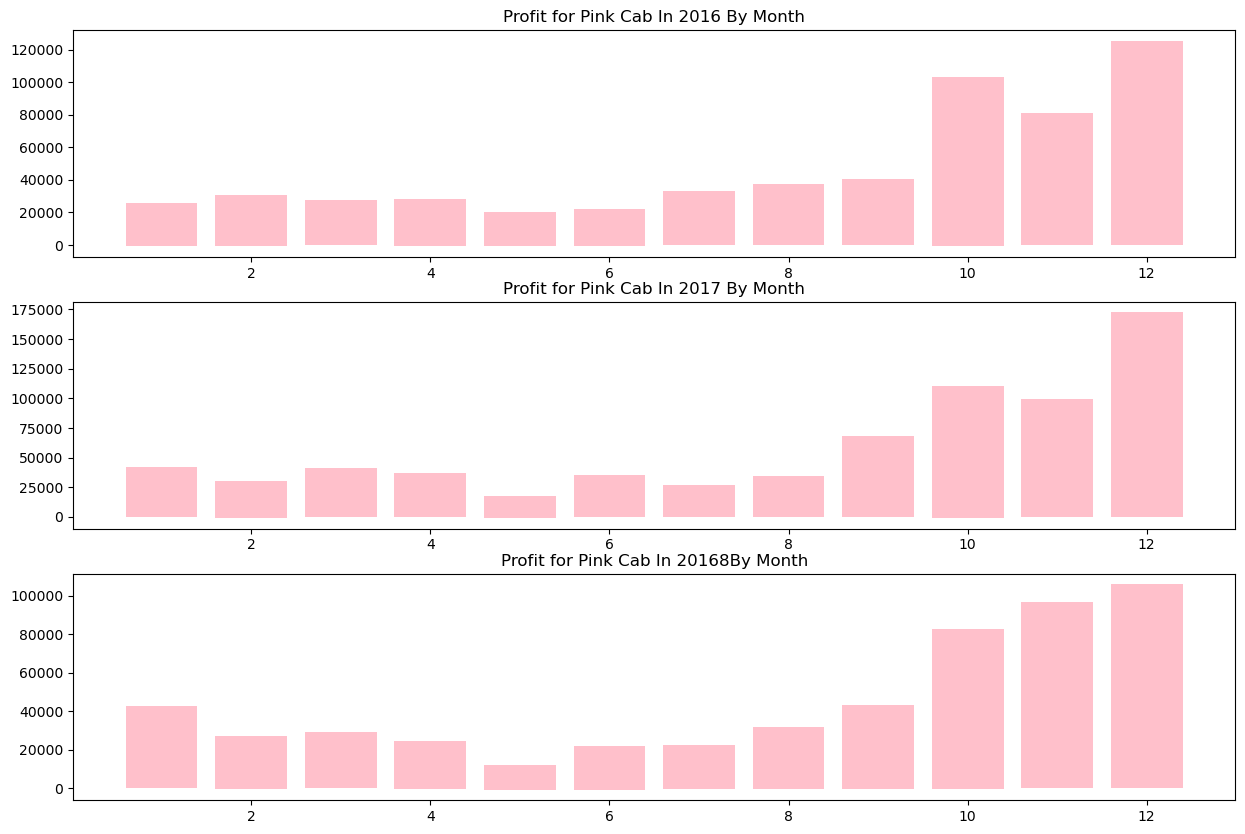

In [36]:
fig,ax = plt.subplots(3,figsize = (15,10))
ax[0].bar(pink_2016['month'], pink_2016['total profit over time'],color = 'pink')
ax[0].ticklabel_format(style='plain', axis='y')
ax[0].set_title('Profit for Pink Cab In 2016 By Month')
ax[1].bar(pink_2017['month'], pink_2017['total profit over time'],color = 'pink')
ax[1].ticklabel_format(style='plain', axis='y')
ax[1].set_title('Profit for Pink Cab In 2017 By Month')
ax[2].bar(pink_2018['month'], pink_2018['total profit over time'],color = 'pink')
ax[2].ticklabel_format(style='plain', axis='y')
ax[2].set_title('Profit for Pink Cab In 20168By Month')
plt.savefig('pink cab Profit time series.png')
plt.show()

In [37]:
profit_over_time_by_city = no_nas_full.groupby(['Company','City','year'])['profit'].sum().to_frame('profit_by_city').reset_index().sort_values(by=['year','profit_by_city'], ascending = [True,False])

yellow_city_2016 = profit_over_time_by_city.loc[(profit_over_time_by_city['Company'] == 'Yellow Cab') & (profit_over_time_by_city['year'] == 2016)]
yellow_city_2017 = profit_over_time_by_city.loc[(profit_over_time_by_city['Company'] == 'Yellow Cab') & (profit_over_time_by_city['year'] == 2017)]
yellow_city_2018 = profit_over_time_by_city.loc[(profit_over_time_by_city['Company'] == 'Yellow Cab') & (profit_over_time_by_city['year'] == 2018)]


pink_2016 = profit_over_time_by_city.loc[(profit_over_time_by_city['Company'] == 'Pink Cab') & (profit_over_time_by_city['year'] == 2016)]
pink_2017 = profit_over_time_by_city.loc[(profit_over_time_by_city['Company'] == 'Pink Cab') & (profit_over_time_by_city['year'] == 2017)]
pink_2018 = profit_over_time_by_city.loc[(profit_over_time_by_city['Company'] == 'Pink Cab') & (profit_over_time_by_city['year'] == 2018)]


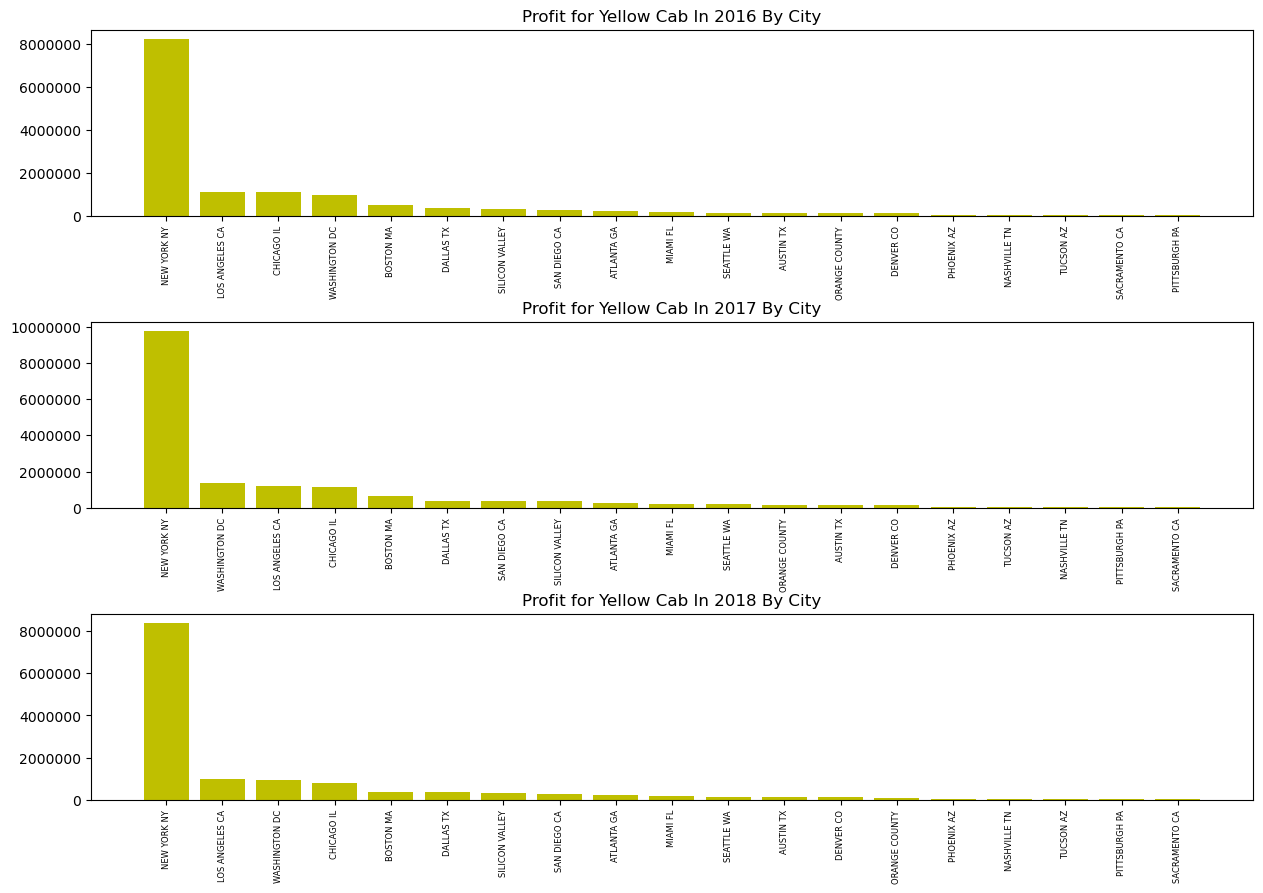

In [38]:
fig,ax = plt.subplots(3,figsize = (15,10))
ax[0].bar(yellow_city_2016['City'], yellow_city_2016['profit_by_city'],color = 'y')
ax[0].ticklabel_format(style='plain', axis='y')
ax[0].set_title('Profit for Yellow Cab In 2016 By City')
ax[0].set_xticklabels(yellow_city_2016['City'],rotation=90,fontsize = 6)

ax[1].bar(yellow_city_2017['City'], yellow_city_2017['profit_by_city'],color = 'y')
ax[1].ticklabel_format(style='plain', axis='y')
ax[1].set_title('Profit for Yellow Cab In 2017 By City')
ax[1].set_xticklabels(yellow_city_2017['City'],rotation=90,fontsize = 6)

ax[2].bar(yellow_city_2018['City'], yellow_city_2018['profit_by_city'],color = 'y')
ax[2].ticklabel_format(style='plain', axis='y')
ax[2].set_xticklabels(yellow_city_2018['City'],rotation=90,fontsize = 6)
ax[2].set_title('Profit for Yellow Cab In 2018 By City')

fig.subplots_adjust(hspace=0.57)
plt.savefig('Yellow cab Profit time series by city.png')
plt.show()

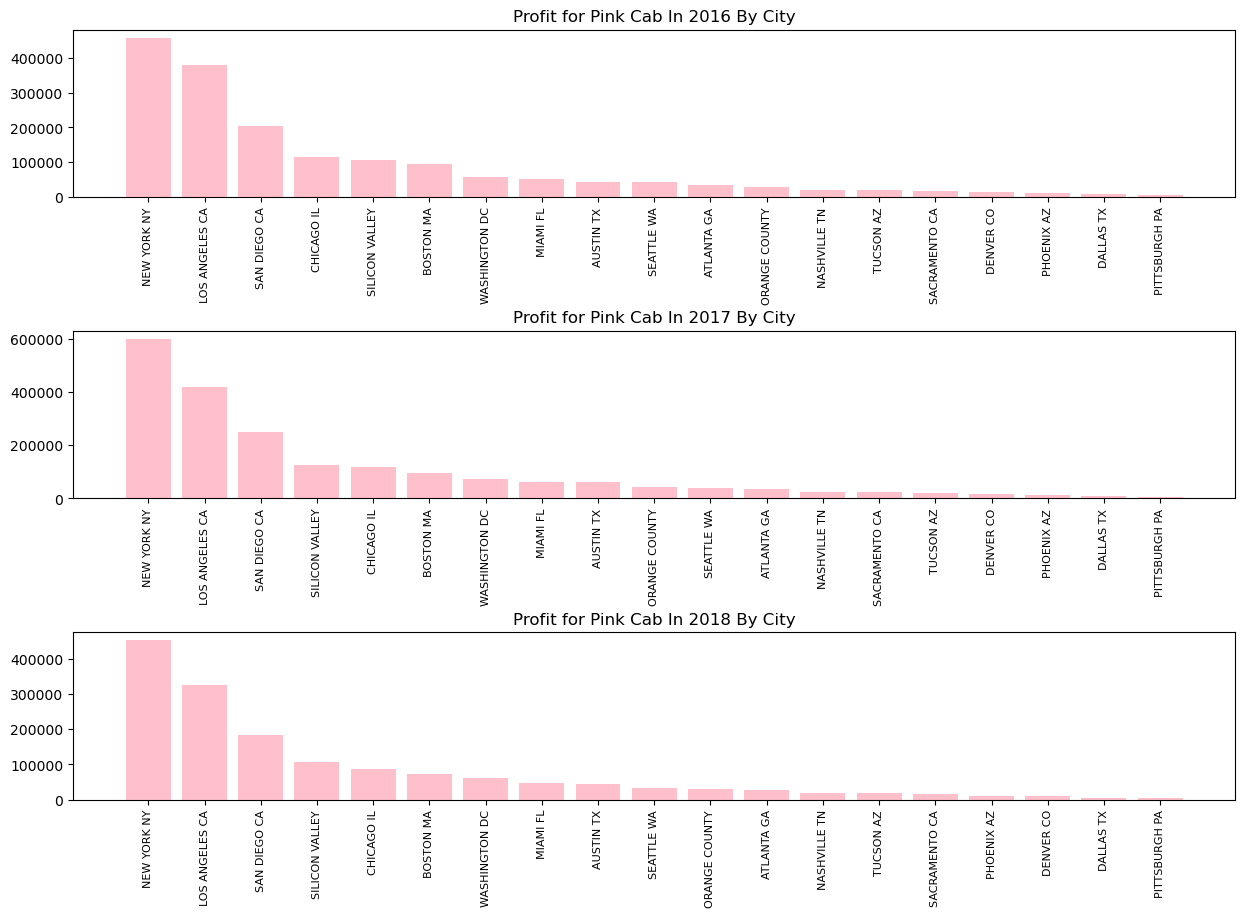

In [39]:
fig,ax = plt.subplots(3,figsize = (15,10))
ax[0].bar(pink_2016['City'], pink_2016['profit_by_city'],color = 'pink')
ax[0].ticklabel_format(style='plain', axis='y')
ax[0].set_title('Profit for Pink Cab In 2016 By City')
ax[0].set_xticklabels(pink_2016['City'],rotation=90,fontsize = 8)

ax[1].bar(pink_2017['City'], pink_2017['profit_by_city'],color = 'pink')
ax[1].ticklabel_format(style='plain', axis='y')
ax[1].set_title('Profit for Pink Cab In 2017 By City')
ax[1].set_xticklabels(pink_2017['City'],rotation=90,fontsize = 8)

ax[2].bar(pink_2018['City'], pink_2018['profit_by_city'],color = 'pink')
ax[2].ticklabel_format(style='plain', axis='y')
ax[2].set_xticklabels(pink_2018['City'],rotation=90,fontsize = 8)
ax[2].set_title('Profit for Pink Cab In 2018 By City')
fig.subplots_adjust(hspace=0.8)
plt.savefig('Pink cab Profit time series by city.png')
plt.show()

## Customer Analysis

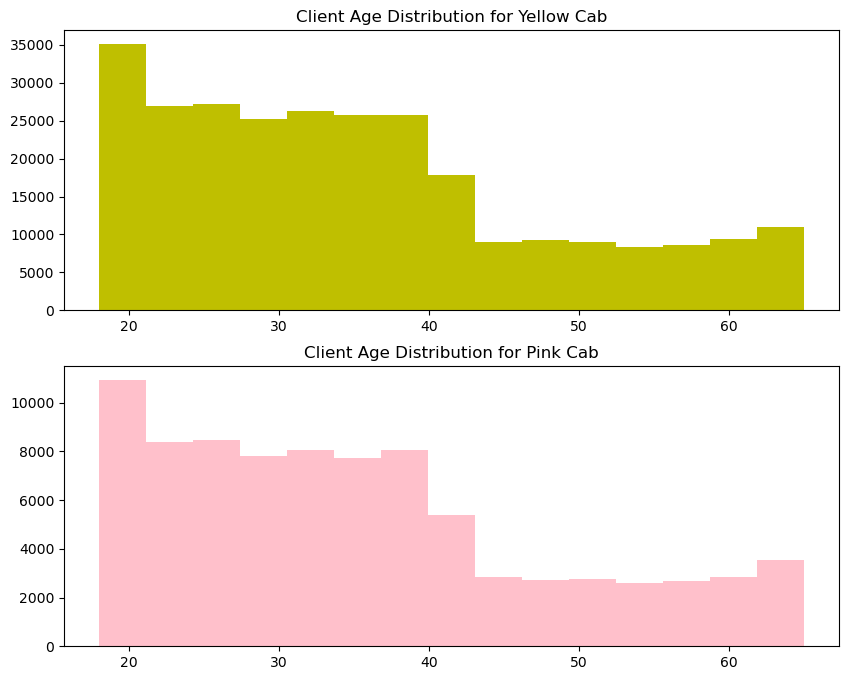

In [40]:
yellowcab = full.loc[full['Company'] == 'Yellow Cab']
pinkcab = full.loc[full['Company'] == 'Pink Cab']

fig,ax = plt.subplots(2,figsize = (10,8))
ax[0].hist(yellowcab['Age'],bins=15,color = 'y')
ax[0].set_title('Client Age Distribution for Yellow Cab')
ax[1].hist(pinkcab['Age'], bins=15, color = 'pink')
ax[1].set_title('Client Age Distribution for Pink Cab')
plt.savefig('customer age.png')
plt.show()

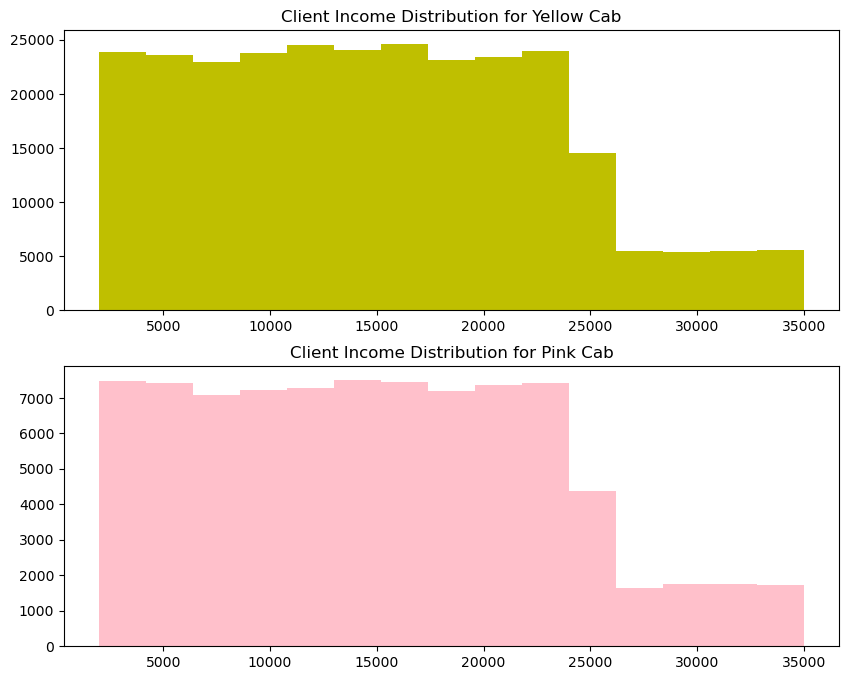

In [41]:
fig,ax = plt.subplots(2,figsize = (10,8))
ax[0].hist(yellowcab['Income (USD/Month)'],bins=15,color = 'y')
ax[0].set_title('Client Income Distribution for Yellow Cab')
ax[1].hist(pinkcab['Income (USD/Month)'], bins=15, color = 'pink')
ax[1].set_title('Client Income Distribution for Pink Cab')
plt.savefig('customer income.png')
plt.show()

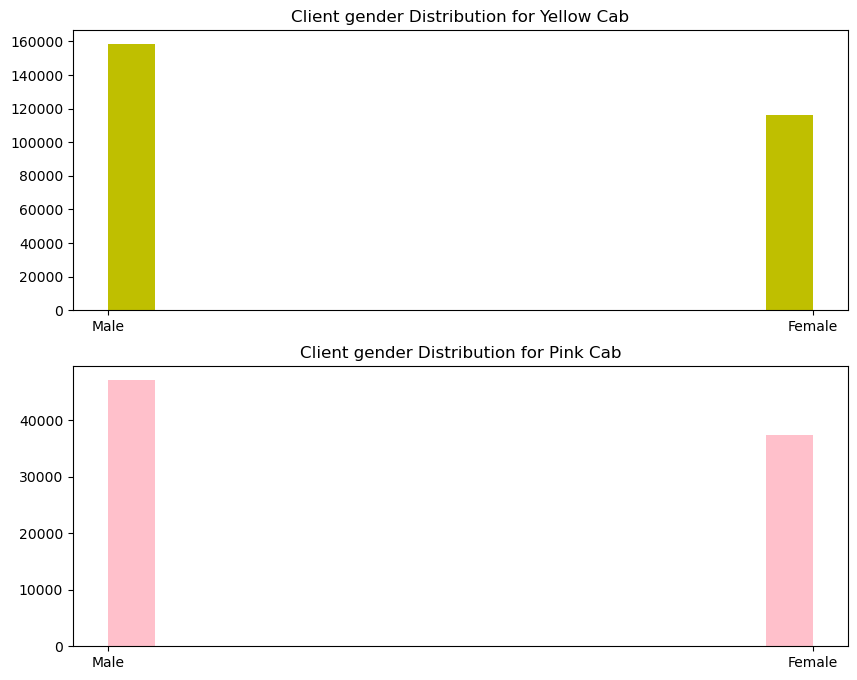

In [42]:
fig,ax = plt.subplots(2,figsize = (10,8))
ax[0].hist(yellowcab['Gender'],bins=15,color = 'y')
ax[0].set_title('Client gender Distribution for Yellow Cab')
ax[1].hist(pinkcab['Gender'], bins=15, color = 'pink')
ax[1].set_title('Client gender Distribution for Pink Cab')
plt.savefig('customer gender.png')
plt.show()

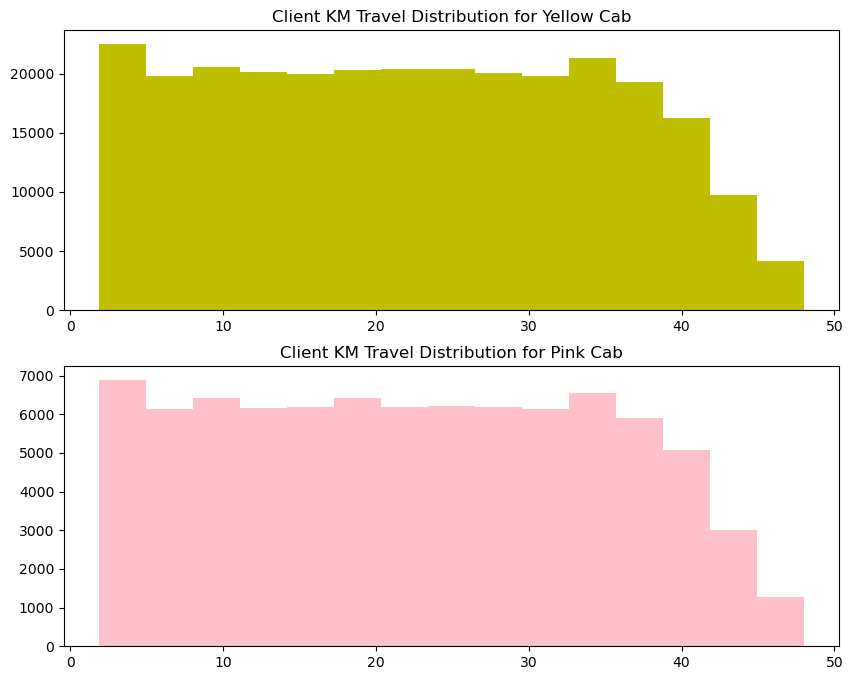

In [43]:
fig,ax = plt.subplots(2,figsize = (10,8))
ax[0].hist(yellowcab['KM Travelled'],bins=15,color = 'y')
ax[0].set_title('Client KM Travel Distribution for Yellow Cab')
ax[1].hist(pinkcab['KM Travelled'], bins=15,color = 'pink')
ax[1].set_title('Client KM Travel Distribution for Pink Cab')
plt.savefig('customer KM Travel.png')
plt.show()

## Purchase Behaviour

In [44]:
purchase = full.groupby('Company')['Payment_Mode'].value_counts().to_frame('payment method count').reset_index()
purchase

,Company,Payment_Mode,payment method count
0,Pink Cab,Card,50719
1,Pink Cab,Cash,33992
2,Yellow Cab,Card,164785
3,Yellow Cab,Cash,109896


In [45]:
number_of_ride = full.groupby('Company')['Customer ID'].value_counts().to_frame('number of ride').reset_index()

In [46]:
pink_loyal = number_of_ride.loc[(number_of_ride['Company'] == 'Pink Cab')]
yellow_loyal = number_of_ride.loc[(number_of_ride['Company'] == 'Yellow Cab')]

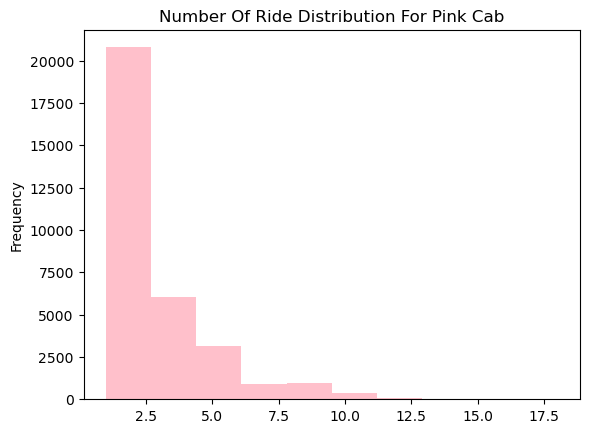

In [47]:
pink_loyal['number of ride'].plot(kind = 'hist',title = 'Number Of Ride Distribution For Pink Cab', color = 'pink')
plt.savefig('numof rides.png')
plt.show()

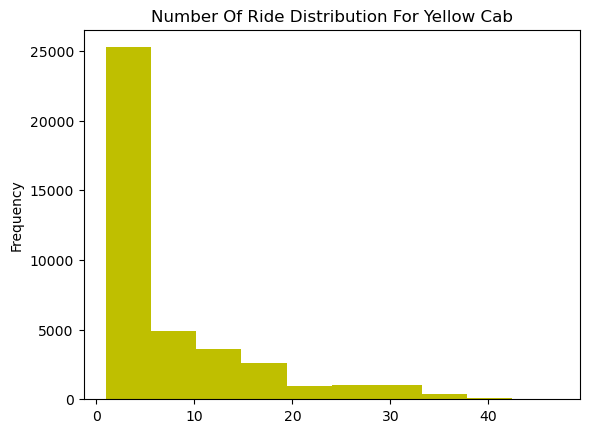

In [48]:
yellow_loyal['number of ride'].plot(kind = 'hist',title = 'Number Of Ride Distribution For Yellow Cab',color = 'y')
plt.savefig('number of ride.png')
plt.show()

In [49]:
print(f'''For Yellow Cab there are {number_of_ride.loc[(number_of_ride['Company'] == 'Yellow Cab')& (number_of_ride['number of ride'] >= 10)]['number of ride'].count()} Customers has 10 or more rides,
For Pink Cab There are {number_of_ride.loc[(number_of_ride['Company'] == 'Pink Cab') & (number_of_ride['number of ride'] >= 10)]['number of ride'].count()} Customers has 10 or more rides.''')

In [50]:
summary = full.groupby('Company').agg({'Customer ID':'count','profit':['sum','mean'],'Age':'mean','Income (USD/Month)':'mean','Price Charged':'mean','Cost of Trip':'mean'})
summary.columns = ['_'.join(col).strip() for col in summary.columns.values]
summary.T

Company,Pink Cab,Yellow Cab
Customer ID_count,84711.0000,274681.0000
profit_sum,5307328.3210,44020373.1708
profit_mean,62.6522,160.2600
Age_mean,35.3224,35.3411
Income (USD/Month)_mean,15059.0471,15045.6698
Price Charged_mean,310.8009,458.1820
Cost of Trip_mean,248.1487,297.9220
